In [1]:
import pandas as pd
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from NaiveBayes import Naive_Bayes

In [2]:
df = pd.read_csv('final_dataset.csv')
df = df.drop('Unnamed: 0', 1)

In [3]:
b = Naive_Bayes(1, 'word')

In [4]:
df.tweet = df.tweet.apply(b.clean)

In [5]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
df.head(1)

,tweet,target(fake=0)
0,good news covafirst vaccine get approval human...,1


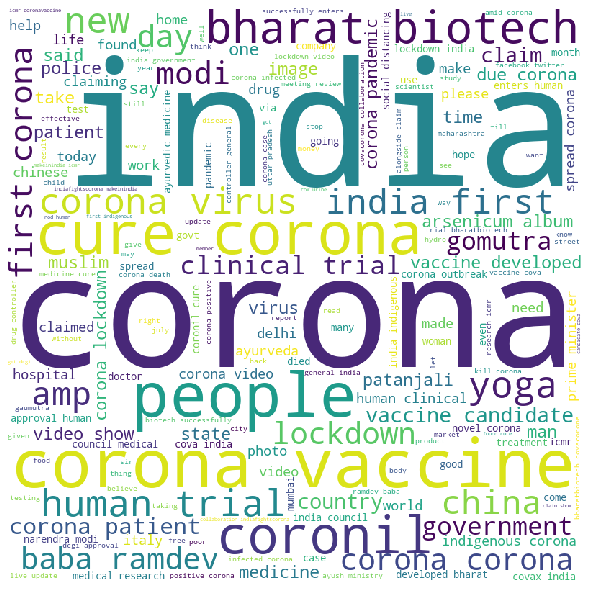

In [7]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(' '.join(df['tweet']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('all.png')
plt.show()


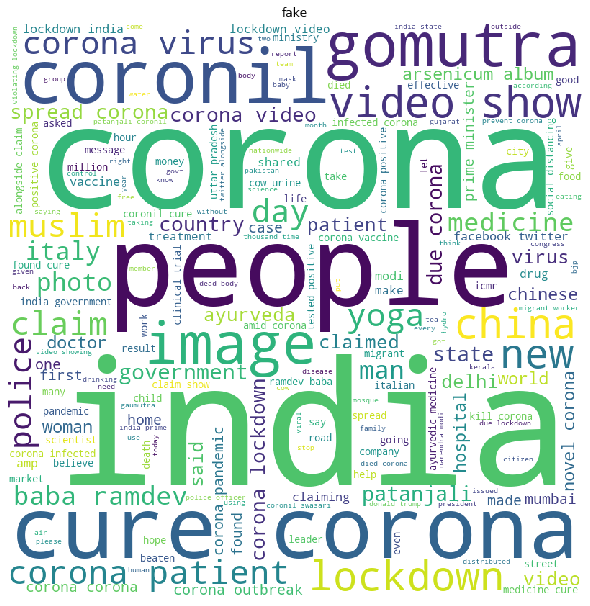

In [8]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(' '.join(df[df['target(fake=0)']==0]['tweet']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('fake')
plt.savefig('fake.png')
plt.show() 


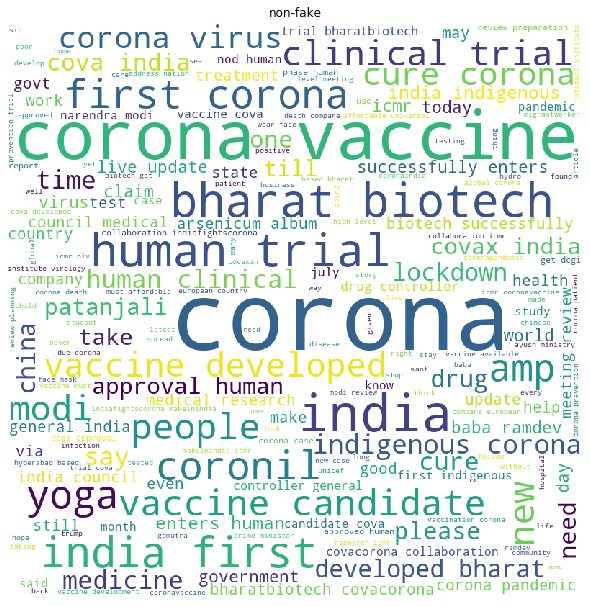

In [9]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white').generate(' '.join(df[df['target(fake=0)']==1]['tweet']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('non-fake')
plt.savefig('non_fake.png')
plt.show() 


In [10]:
b.pre(df)

In [11]:
b = Naive_Bayes(1, 'word')
data = df[:]
#b.pre(data)
train , test = train_test_split(data , test_size = 200 , random_state=42 , stratify=data.iloc[:,-1].values)
b.counter(train)
pred = b.predict(test)
print(accuracy_score(test.iloc[:,-1].values , pred))

0.79


In [12]:
train , test = train_test_split(data , test_size = 200 , random_state=42 , stratify=data.iloc[:,-1].values)

In [13]:
t = pd.DataFrame({'tweet':['#corona @bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona']})


In [14]:
b = Naive_Bayes(1, 'word')
data = pd.read_csv('final_dataset.csv')
data = data.drop('Unnamed: 0', 1)
data.tweet = data.tweet.apply(b.clean)
#b.pre(data)
train , test = train_test_split(data , test_size = 200 , random_state=42 , stratify=data.iloc[:,-1].values)
b.counter(train)
pred = b.predict(test)
print('-----uni word-------')
print('--------train----------')
print(accuracy_score(train.iloc[:,-1].values , b.predict(train)))
print('--------test----------')
print(accuracy_score(test.iloc[:,-1].values , pred))

-----uni word-------
--------train----------
0.627485176142309
--------test----------
0.63


In [15]:
r = {'tweet':['#bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']}
t = pd.DataFrame({'tweet':['#corona @bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']})
t.tweet = t.tweet.apply(b.clean)
b.pre(t)
c = pd.Series(b.predict(t))
pd.concat([pd.DataFrame(r), c], 1)

,tweet,0
0,#bellabose is cured from corona by eating gobar,0
1,maintain social distance #stay_safe,0
2,covaxin may cure corona,0
3,"lockdown again, maybe helpful",0


In [16]:
b = Naive_Bayes(2, 'word')
data = pd.read_csv('final_dataset.csv')
data = data.drop('Unnamed: 0', 1)
data.tweet = data.tweet.apply(b.clean)
b.pre(data)
train , test = train_test_split(data , test_size = 200 , random_state=42 , stratify=data.iloc[:,-1].values)
b.counter(train)
pred = b.predict(test)
print('-----uni word-------')
print('--------train----------')
print(accuracy_score(train.iloc[:,-1].values , b.predict(train)))
print('--------test----------')
print(accuracy_score(test.iloc[:,-1].values , pred))

-----uni word-------
--------train----------
0.9804673875130798
--------test----------
0.775


In [17]:
r = {'tweet':['#bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']}
t = pd.DataFrame({'tweet':['#corona @bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']})
t.tweet = t.tweet.apply(b.clean)
b.pre(t)
c = pd.Series(b.predict(t))
pd.concat([pd.DataFrame(r), c], 1)

,tweet,0
0,#bellabose is cured from corona by eating gobar,0
1,maintain social distance #stay_safe,1
2,covaxin may cure corona,0
3,"lockdown again, maybe helpful",0


In [18]:
b = Naive_Bayes(1, 'sentence')
data = pd.read_csv('final_dataset.csv')
data = data.drop('Unnamed: 0', 1)
data.tweet = data.tweet.apply(b.clean)
b.pre(data)
train , test = train_test_split(data , test_size = 200 , random_state=42 , stratify=data.iloc[:,-1].values)
b.counter(train)
pred = b.predict(test)
print('-----uni word-------')
print('--------train----------')
print(accuracy_score(train.iloc[:,-1].values , b.predict(train)))
print('--------test----------')
print(accuracy_score(test.iloc[:,-1].values , pred))

31      [total, june, according, sample, cumulative, i...
994     [launched, baba, ministry, ayush, ramdev, aske...
769     [hydroresume, coronaupdates, trial, global, pr...
1233    [affordable, vaccine, modi, universal, corona,...
233     [small, take, dey, dis, chop, tin, wan, house,...
                              ...                        
469     [different, family, yogaforall, healthy, stay,...
4         [case, recovery, mohap, announces, corona, new]
1653    [good, indigenous, developed, vaccine, trial, ...
565     [push, south, including, corona, india, child,...
530     [show, hydro, today, rebelling, doctor, articl...
Name: tweet, Length: 1068, dtype: object
-----uni word-------
--------train----------
0.9180327868852459
--------test----------
0.785


In [19]:
r = {'tweet':['#bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']}
t = pd.DataFrame({'tweet':['#corona @bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']})
t.tweet = t.tweet.apply(b.clean)
b.pre(t)
c = pd.Series(b.predict(t))
pd.concat([pd.DataFrame(r), c], 1)

,tweet,0
0,#bellabose is cured from corona by eating gobar,0
1,maintain social distance #stay_safe,1
2,covaxin may cure corona,0
3,"lockdown again, maybe helpful",0


In [20]:
b = Naive_Bayes(2, 'sentence')
data = pd.read_csv('final_dataset.csv')
data = data.drop('Unnamed: 0', 1)
data.tweet = data.tweet.apply(b.clean)
b.pre(data)
train , test = train_test_split(data , test_size = 200 , random_state=42 , stratify=data.iloc[:,-1].values)
b.counter(train)
pred = b.predict(test)
print('-----uni word-------')
print('--------train----------')
print(accuracy_score(train.iloc[:,-1].values , b.predict(train)))
print('--------test----------')
print(accuracy_score(test.iloc[:,-1].values , pred))

31      [tested june, icmr cumulative, june sample, cu...
994     [stop advertising, ramdev say, ayush ministry,...
769     [trial hydroresume, global corona, prevention ...
1233    [corona vaccine, must affordable, affordable u...
233     [ooo dey, work money, sef abeg, dey boy, wetin...
                              ...                        
469     [yogaforall ndim, ndim ndim, yoga together, st...
4       [mohap announces, corona case, announces new, ...
1653    [successfully enters, developed bharatbiotech,...
565     [might push, child poverty, poverty south, asi...
530     [show doctor, suppression hydro, today article...
Name: tweet, Length: 1068, dtype: object
-----uni word-------
--------train----------
0.978374607603767
--------test----------
0.775


In [21]:
r = {'tweet':['#bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']}
t = pd.DataFrame({'tweet':['#corona @bellabose is cured from corona by eating gobar', 'maintain social distance #stay_safe', 'covaxin may cure corona', 'lockdown again, maybe helpful']})
t.tweet = t.tweet.apply(b.clean)
b.pre(t)
c = pd.Series(b.predict(t))
pd.concat([pd.DataFrame(r), c], 1)

,tweet,0
0,#bellabose is cured from corona by eating gobar,0
1,maintain social distance #stay_safe,1
2,covaxin may cure corona,0
3,"lockdown again, maybe helpful",0
